In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv(r"C:\Users\bhuva\Downloads\archive (3)\HR_comma_sep.csv")   
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [191]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

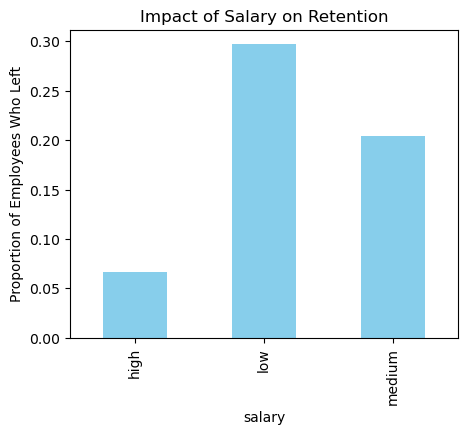

In [192]:
df.groupby('salary')['left'].mean().plot(kind='bar', color='skyblue', figsize=(5,4), title='Impact of Salary on Retention')
plt.ylabel('Proportion of Employees Who Left')
plt.show()

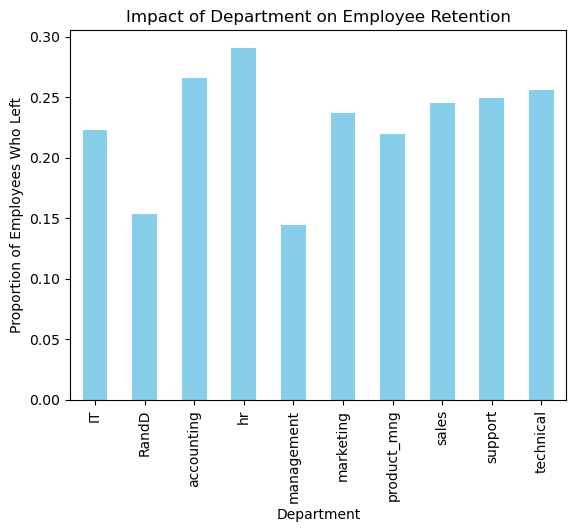

In [211]:
df.groupby('Department')['left'].mean().plot(kind='bar', title='Impact of Department on Employee Retention', ylabel='Proportion of Employees Who Left', color='skyblue')
plt.show()

In [217]:
from sklearn.preprocessing import LabelEncoder

In [219]:
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])  

In [221]:
df = pd.get_dummies(df,columns=['Department'], drop_first=True)

In [223]:
df.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
salary                      int32
Department_RandD             bool
Department_accounting        bool
Department_hr                bool
Department_management        bool
Department_marketing         bool
Department_product_mng       bool
Department_sales             bool
Department_support           bool
Department_technical         bool
dtype: object

In [225]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

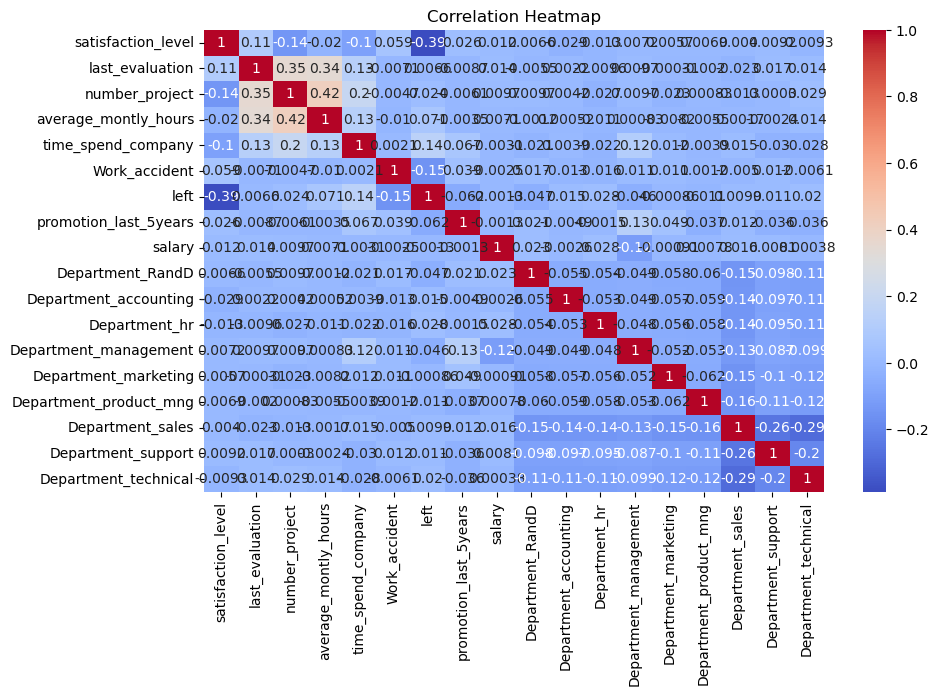

In [227]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [229]:
x = df.drop('left', axis=1)
y = df['left']

In [231]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,1,False,False,False,False,False,False,True,False,False


In [233]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [235]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [239]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [241]:
x_train.shape,y_train.shape

((11999, 17), (11999,))

In [243]:
x_test.shape,y_test.shape

((3000, 17), (3000,))

In [245]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [247]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [249]:
y_pred=model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [251]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [253]:
accuracy_score(y_test, y_pred)

0.7573333333333333

In [255]:
roc_auc_score(y_test, y_pred)

0.5741360020351156

In [257]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2111,  183],
       [ 545,  161]], dtype=int64)

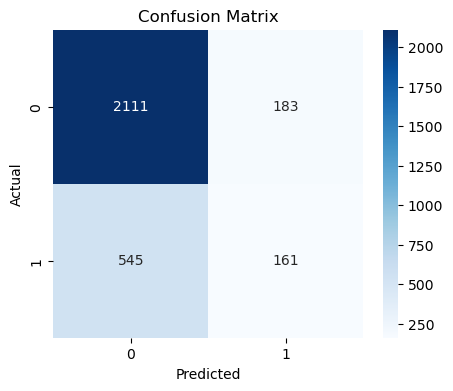

In [259]:
#plot for confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()